<a href="https://colab.research.google.com/github/Chanura04/Maths-CW/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Modelling Travel Time

In [33]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import latex
from IPython.display import display, Math
import cv2

In [34]:
x=sp.symbols('x')
y=sp.symbols('y')
a=sp.symbols('a')
b=sp.symbols('b')
c=sp.symbols('c')
T=sp.symbols('T')

In [35]:
T_b=a *( x**2) + b * (y**2)
print(f"T_b(x,y)= {latex(T_b)}")


T_b(x,y)= a x^{2} + b y^{2}


In [36]:
T_t= sp.sqrt(c * (x **2 + y**2))
print("T_t(x,y)=",T_t)

T_t(x,y)= sqrt(c*(x**2 + y**2))


In [37]:
diff_T_b_by_x=sp.diff(T_b,x)
print("Partial derivative of travelling time by bus ,with respect to x  \n")

print(f"∂T/∂x= {latex(diff_T_b_by_x)}")

Partial derivative of travelling time by bus ,with respect to x  

∂T/∂x= 2 a x


In [38]:
diff_T_b_by_y=sp.diff(T_b,y)
print("Partial derivative of travelling time by bus ,with respect to y  \n")

print(f"∂T/∂y= {latex(diff_T_b_by_y)}")

Partial derivative of travelling time by bus ,with respect to y  

∂T/∂y= 2 b y


In [39]:
#Calculate Gradient value for bus
gradient_latex = f"{T}_b =( {latex(diff_T_b_by_x)} , {latex(diff_T_b_by_y)})"
print(gradient_latex)

T_b =( 2 a x , 2 b y)


In [40]:
diff_T_t_by_x=sp.diff(T_t,x)
print("Partial derivative of travelling time by taxi ,with respect to 𝑥  \n")
print(f"∂T/∂x= \n")
sp.simplify(diff_T_t_by_x)
#print(f"T_t_by_x= {diff_T_t_by_x}")

Partial derivative of travelling time by taxi ,with respect to 𝑥  

∂T/∂x= 



x*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [41]:
diff_T_t_by_y=sp.diff(T_t,y)
print("Partial derivative of travelling time by taxi ,with respect to y  \n")
print(f"∂T/∂y= \n")
sp.simplify(diff_T_t_by_y)
#print(f"T_t_by_y= {diff_T_t_by_y}")

Partial derivative of travelling time by taxi ,with respect to y  

∂T/∂y= 



y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [42]:
#Calculate Gradient value for taxi
gradient_latex = f"\\nabla T_t = \\left( {latex(diff_T_t_by_x)},\\ {latex(diff_T_t_by_y)} \\right)"
display(Math(gradient_latex))

<IPython.core.display.Math object>

### Interpretation for bus travel time

In [43]:
rate_for_bus=diff_T_b_by_x / diff_T_b_by_y
sp.simplify(rate_for_bus)


a*x/(b*y)

```
x = total route distance (in km)
```

```
y = traffic delay factor (in minutes per km)
```


   
**For this problem x= 4.5km is fixed.**

if a>>b, that represent longer route have bigger effect on travel time than congestion.

if b>>a, that represent congestion and stop related delays have much bigger effect than distance.

  *    Since the problem specifies that the bus route include multiple stops, the stops related to delays and traffic delays contribute to the b. Therefore y represent the overall higher impact. We cant think the traffic has not impact for the travel time because the ratio shows b is effect to overall result.


### Interpretation for taxi travel time

In [44]:
rate_for_taxi=diff_T_t_by_x / diff_T_t_by_y
sp.pprint(rate_for_taxi)

x
─
y




*  According to result x and y has similar impact for the travel time. But in the problem distance has approximately fixed value. which is 4.5 km. However the only way for impact to travel time is variation of traffic delay.
Finally the y has greater impact for  taxi travel time.



## 2. Cost Analysis Using Integration

In [45]:
t=sp.symbols('t')
bus_express= 2 * t + 1
taxi_express= 3 * t + 2

print(f"F_bus =>  ∫ ( {latex(bus_express)} )dt  , Limit 0 to x \n")
print(f"F_taxi =>  ∫ ( {latex(taxi_express)} )dt  , Limit 0 to x")

F_bus =>  ∫ ( 2 t + 1 )dt  , Limit 0 to x 

F_taxi =>  ∫ ( 3 t + 2 )dt  , Limit 0 to x


In [46]:
f_bus=sp.integrate(bus_express,(t,0,x))
print(f"f_bus = {latex(f_bus)}")
# sp.simplify(f_bus)

f_bus = x^{2} + x


In [47]:
f_taxi=sp.integrate(taxi_express,(t,0,x))
print(f"f_taxi = \n\n")
sp.simplify(f_taxi)

f_taxi = 




x*(3*x + 4)/2

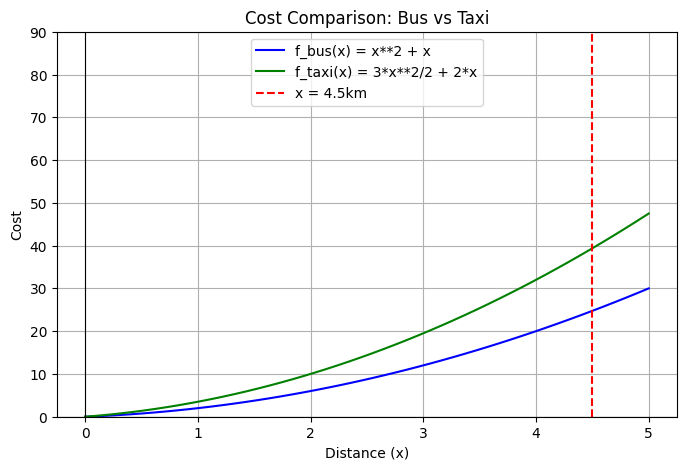

In [48]:
#Create spaced values
x_vals = np.linspace(0, 5)

# Use sp.lambdify to convert symbolic expressions to numerical functions
f_bus_np = sp.lambdify(x, f_bus, "numpy")
f_taxi_np = sp.lambdify(x, f_taxi, "numpy")

#Apply distance values for functions
y_vals_bus = f_bus_np(x_vals)
y_vals_taxi = f_taxi_np(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals_bus, label=f"f_bus(x) = {f_bus}", color='blue')
plt.plot(x_vals, y_vals_taxi, label=f"f_taxi(x) = {f_taxi}", color='green')
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.ylim(0, 90)
plt.legend()

plt.grid(True)
plt.title("Cost Comparison: Bus vs Taxi")
plt.xlabel("Distance (x)")
plt.ylabel("Cost")
plt.show()

In [49]:
#simplyfy the ratio
simplified_expr=sp.simplify(f_taxi/f_bus)

#simplifie fraction into numerator aand denominator
quotient, remainder = sp.div(simplified_expr.as_numer_denom()[0], simplified_expr.as_numer_denom()[1], domain='QQ')

print(f"f_taxi / f_bus= {quotient} ")

f_taxi / f_bus= 3/2 


```
f_taxi = 1.5 * f_bus
```

Acorss both short and long-distance journeys, bus transporation proves to be more cost effective. because taxi cost fuction is uniformly 1.5 times greater than the corresponding bus cost fuction.

## 3.Predicting Peak Travel Times Using Series Convergence

In [50]:
t=sp.symbols("t")

In [51]:
passenger_volume= 5 + 4* sp.sin(sp.pi*t) - (3/2)  * (t)**2 + (t**4)/4
sp.simplify(passenger_volume)

0.25*t**4 - 1.5*t**2 + 4.0*sin(pi*t) + 5.0

In [52]:
p_func=sp.lambdify(t,passenger_volume,"numpy") # symbolic expression to numeric function
time_vals=np.linspace(0,24,500)  # Time range

p_val=p_func(time_vals)   # passenger volumn values

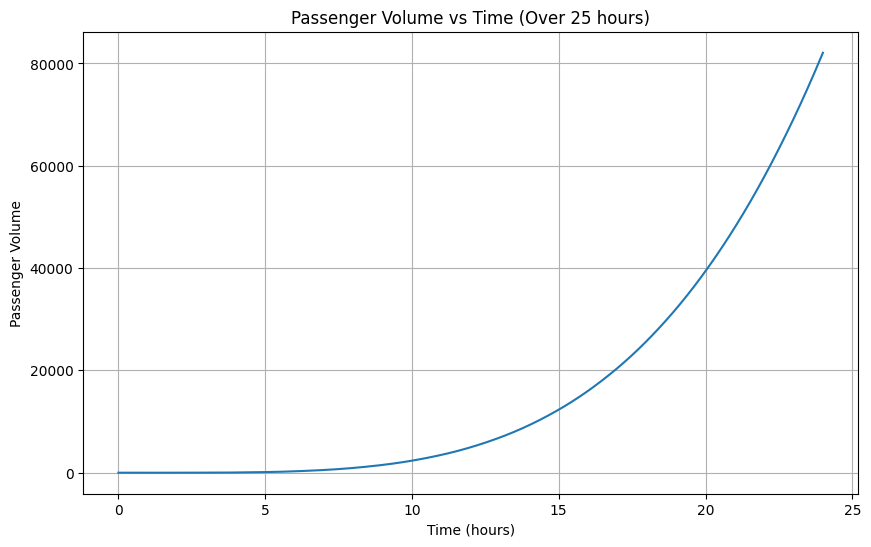

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(time_vals,p_val)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume")
plt.title("Passenger Volume vs Time (Over 25 hours)")
plt.grid(True)

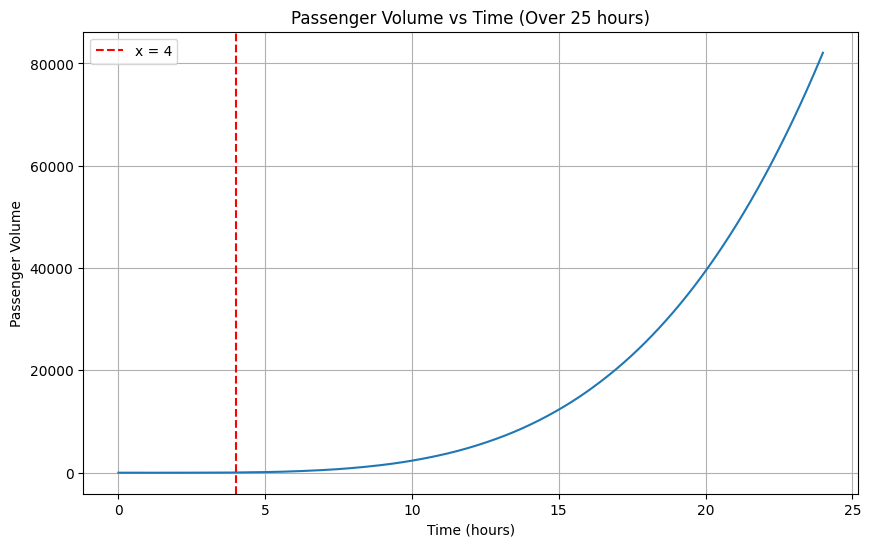

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(time_vals,p_val)
plt.axvline(x=4, color='red', linestyle='--', linewidth=1.5, label='x = 4')
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume")
plt.title("Passenger Volume vs Time (Over 25 hours)")
plt.legend()
plt.grid(True)

In [55]:
for i in range(2,11):
  print(f"Passenger volume at t={i} hours: {p_func(i)}")

Passenger volume at t=2 hours: 2.999999999999999
Passenger volume at t=3 hours: 11.750000000000002
Passenger volume at t=4 hours: 45.0
Passenger volume at t=5 hours: 123.75
Passenger volume at t=6 hours: 275.0
Passenger volume at t=7 hours: 531.75
Passenger volume at t=8 hours: 933.0
Passenger volume at t=9 hours: 1523.75
Passenger volume at t=10 hours: 2355.0


According to these results the 4-term approximation shows unrealistic exponential growth after t > 4 hours due to the t^4 term dominating  . base on the periodic sin(πt) , it create peaks in every two hours. but the polynomial terms like t^4 and t^2 prevents clear identification in graph because term grows fast. From results represent in passenger volume is continuosly increase over time.

For real peak times should be around 6-9 AM and 5-7 PM, but this 4 tream formula is not realistic for large t.

## 4) Travel Pattern Analysis Using Fourier Transform

In [56]:
# Time settings
interval_min = 5
total_hours = 15  # 6 AM to 9 PM
N = int((total_hours * 60) / interval_min) #number of time steps(samples)

# Time array (in hours)
t = np.linspace(0, total_hours, N)

# Simulated boarding counts
bus_boarding_eq = (
    40                    #baseline count
    + 20 * np.sin(2 * np.pi * t / 24 * 2)  # morning and evening rush peaks
    + 15 * np.sin(2 * np.pi * t / 24 * 4)   # add some real world behavior
    + np.random.normal(0, 3, N)           # random noise=> mean 0 , std 3
)

taxi_boarding_eq = (
    25
    + 15 * np.sin(2 * np.pi * t / 24 * 2)
    + 10 * np.sin(2 * np.pi * t / 24 * 4)
    + np.random.normal(0, 2, N)
)

# Fourier Transform (convert time domain into frequency)
bus_fft = np.fft.fft(bus_boarding_eq)
taxi_fft = np.fft.fft(taxi_boarding_eq)

# Frequencies to FFT
freqs = np.fft.fftfreq(N, d=interval_min*60)

In [57]:
len(bus_boarding_eq)

180

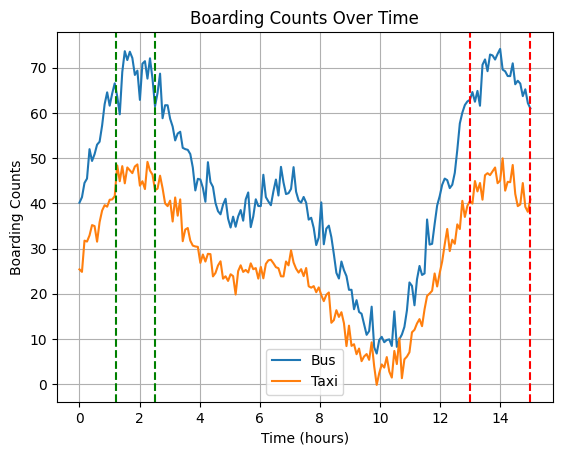

In [58]:
plt.plot(t,bus_boarding_eq, label="Bus")
plt.plot(t,taxi_boarding_eq, label="Taxi")
plt.xlabel("Time (hours)")
plt.ylabel("Boarding Counts")
plt.axvline(x=1.2, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=13, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=15, color='red', linestyle='--', linewidth=1.5)


plt.title("Boarding Counts Over Time")
plt.legend()
plt.grid(True)
plt.show()

X axis represents the 0 to 15 hours

Y axis represents the number of passengers boarding buses and taxis.

Key Obervation:
  1) Morning Peak:
    Morning peak that indicate around 1- 3 hour range. that time bus boarding count is rise sharply to 70+ passengers indicating morning rush.
    the taxi also increase but that indicate lower boarding count (45), that suggesting taxis are used but less that buses during this peak times.
  2) Mid Peak:
    after 4 to 10 hours both bus and taxi counts drop significantly.that indicate a clear off peak period.In real life that time will be the late late morining and early afternoon.
  3) Evening Peak:
    Both buses and taxis boarding counts rise again after 10. Again the morning pattern is reapeating. Same as the morning the buses boarding demand is greater than the taxis boarding demand.

  Here the both morning and evening bus has greater demand than the taxis. because the taxi cost significantly higer than the bus cost, so people every time choose the cheap option.I prooved that in pervoius cost analysis question.


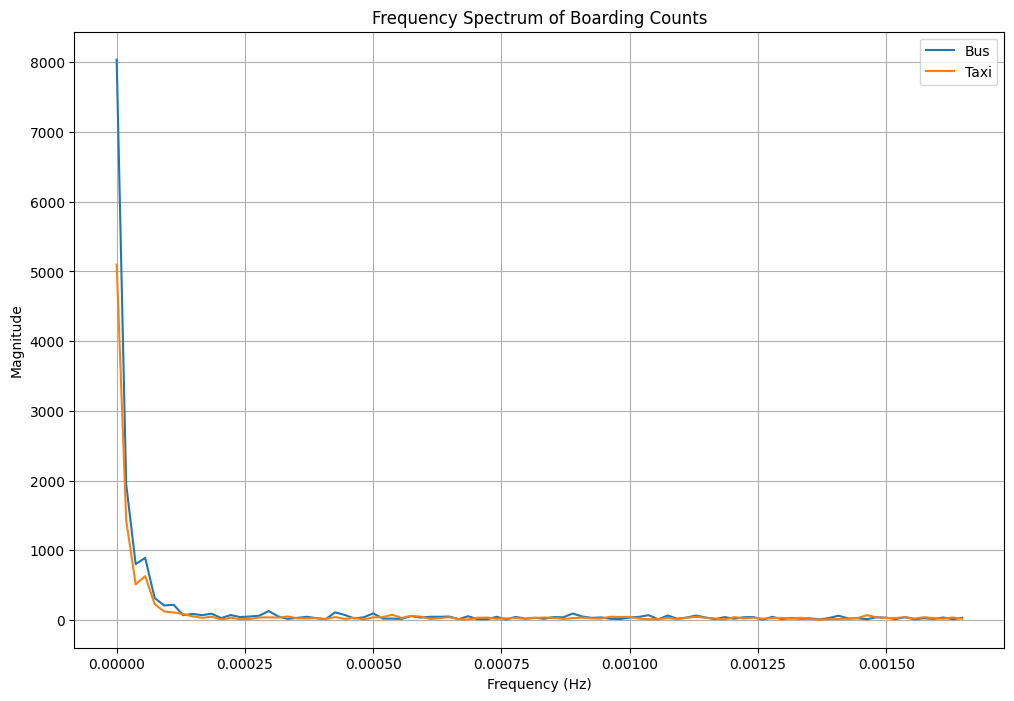

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(freqs[:N//2], np.abs(bus_fft[:N//2]), label="Bus")
plt.plot(freqs[:N//2], np.abs(taxi_fft[:N//2]), label="Taxi")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Boarding Counts")
plt.legend()
plt.grid(True)
plt.show()


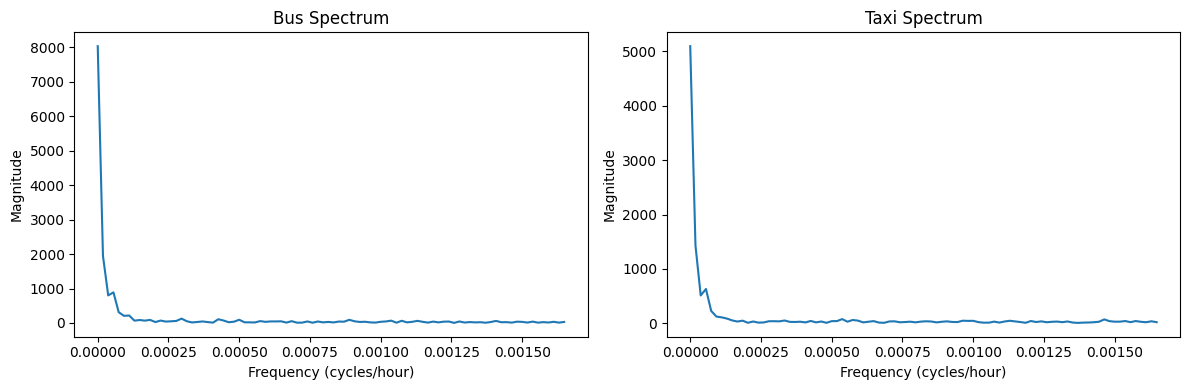

In [60]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(freqs[:90], np.abs(bus_fft[:90]), label='Bus')
plt.xlabel('Frequency (cycles/hour)'); plt.ylabel('Magnitude'); plt.title('Bus Spectrum')
plt.subplot(1,2,2)
plt.plot(freqs[:90], np.abs(taxi_fft[:90]), label='Taxi')
plt.xlabel('Frequency (cycles/hour)'); plt.ylabel('Magnitude'); plt.title('Taxi Spectrum')
plt.tight_layout(); plt.show()


#### C)

However the fourier analysis confirms that passenger demand follows a strong and repeatable daily pattern rather than random fluctuations. This allows transport operators to schedule more buses and taxis during peak travel periods and reduce service during off peak hours to improce effiency and passenger experience.  

Daily pattern is dominant, the morning and evening peaks will happen again tomorrow.


For buses the strong dominance at very low frequencies indicate highly strucuted and repeatable cycles, with clearly shows passenger volume during the mornig and evening rush hours. This suggest bus operator should allocate more vehicales and increase service frequency during these peaks, the spectrum flattens showing that bus usage remains relatively stable, which represent fewer buses can managable without decrease the service qulity.

In contrast, taxi spectrum also shows low frequency peaks aligned with morning and evening travel times, but the magnitude is lower which indicate taxi demand is less intense and more variable.


However the results suggest that bus services most uses for transport during rush hours, while taxi service is fluctuating base on passenger behaviour.


## 5) Image Processing Using Fourier and Discrete Cosine Transforms

### a)

array([[[  0,   5,   4],
        [  0,   4,   3],
        [  0,   3,   2],
        ...,
        [133, 136, 141],
        [141, 144, 149],
        [152, 155, 160]],

       [[  0,   5,   4],
        [  0,   4,   3],
        [  0,   3,   2],
        ...,
        [138, 141, 146],
        [145, 148, 153],
        [150, 153, 158]],

       [[  2,   4,   4],
        [  1,   3,   3],
        [  1,   3,   3],
        ...,
        [146, 149, 154],
        [150, 153, 158],
        [147, 150, 155]],

       ...,

       [[148, 153, 162],
        [148, 153, 162],
        [148, 153, 162],
        ...,
        [141, 141, 147],
        [140, 140, 146],
        [140, 140, 146]],

       [[147, 152, 161],
        [147, 152, 161],
        [148, 153, 162],
        ...,
        [141, 141, 147],
        [140, 140, 146],
        [140, 140, 146]],

       [[147, 152, 161],
        [147, 152, 161],
        [147, 152, 161],
        ...,
        [141, 141, 147],
        [140, 140, 146],
        [140, 140, 146]]], dtype=uint8)
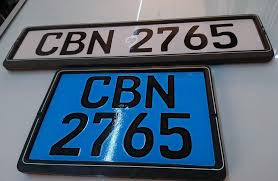

In [61]:
img=cv2.imread("Vehicle_plate.png")
img

array([[[  4,   5,   0],
        [  3,   4,   0],
        [  2,   3,   0],
        ...,
        [141, 136, 133],
        [149, 144, 141],
        [160, 155, 152]],

       [[  4,   5,   0],
        [  3,   4,   0],
        [  2,   3,   0],
        ...,
        [146, 141, 138],
        [153, 148, 145],
        [158, 153, 150]],

       [[  4,   4,   2],
        [  3,   3,   1],
        [  3,   3,   1],
        ...,
        [154, 149, 146],
        [158, 153, 150],
        [155, 150, 147]],

       ...,

       [[162, 153, 148],
        [162, 153, 148],
        [162, 153, 148],
        ...,
        [147, 141, 141],
        [146, 140, 140],
        [146, 140, 140]],

       [[161, 152, 147],
        [161, 152, 147],
        [162, 153, 148],
        ...,
        [147, 141, 141],
        [146, 140, 140],
        [146, 140, 140]],

       [[161, 152, 147],
        [161, 152, 147],
        [161, 152, 147],
        ...,
        [147, 141, 141],
        [146, 140, 140],
        [146, 140, 140]]], dtype=uint8)
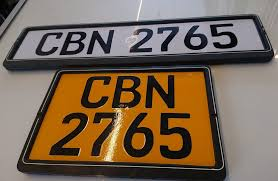

In [62]:
img_t_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_t_rgb

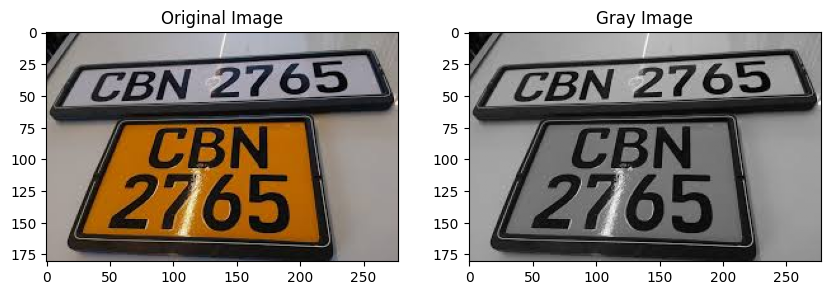

In [63]:
cnvert_t_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_t_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cnvert_t_gray,cmap="gray")
plt.title("Gray Image")
plt.show()

### b)

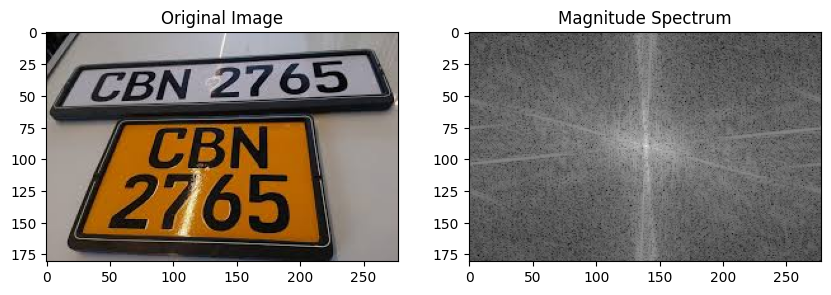

In [64]:
#apply 2D fourier transformer
fourier_transform=np.fft.fft2(cnvert_t_gray)

#shift the zero frequency to the center
fourier_transform_shift=np.fft.fftshift(fourier_transform)

#apply logarithmic scalling to complex numbers
magnitude=np.log(1+np.abs(fourier_transform_shift))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_t_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(magnitude,cmap="gray")
plt.title("Magnitude Spectrum")
plt.show()

### c)

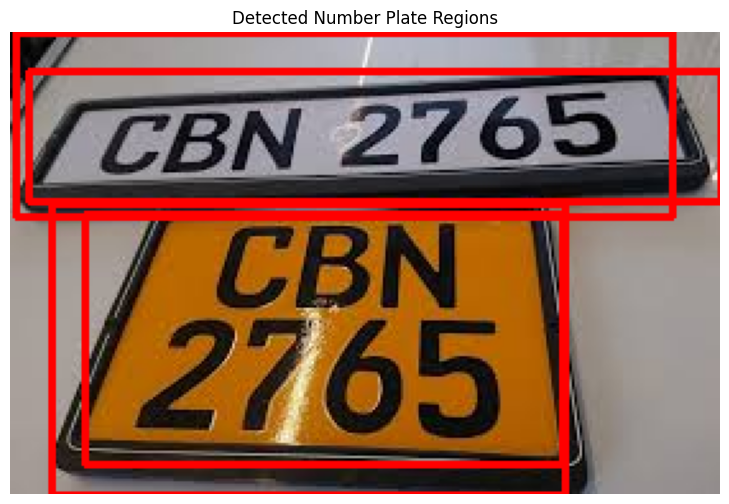

In [69]:
# Edge detection
edges = cv2.Canny(cnvert_t_gray, 100, 200)

# Find continous curve
continous_curve, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy image for drawing
img_contour = img_t_rgb.copy()

# Loop through contours and draw rectangles
for cnt in continous_curve:
    x, y, w, h = cv2.boundingRect(cnt)  # find smallest rectangle
    aspect_ratio = w / h

    # Adjusted condition to allow wider range of plate shapes  2 6
    if 1.5 < aspect_ratio < 7 and 50 < w < 600 and 15 < h < 200:
        cv2.rectangle(img_contour, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(img_contour)
plt.title("Detected Number Plate Regions")
plt.axis("off")
plt.show()


### d)

Mainly in DCT, it decompose the image into frequency componenets. The low frequency component represent smooth regions and the backgroup areas of the number plate , The High frequency component represent sharp edge, text characters and plate boundaries. However this reveals that number plate have a distinct structure. The transformed image center region represent to overall brightness and plate backgroud, and outer regions capture edges and character stokes.



If we use fourier and DCT together for recogniztion it,
  
* Enhance edges and character recognition
* Reduce noise
* Sparate useful plate information from irrelevant backgound details.
* Enhance plate localisation accuracy

Overall, these techiniques lead for traffic optimisation. For that this system helps to find,

* Vehical counting on specific routes  
* Identification of peak traffic periods
* Detecting frequently used routes

finally, system can optimize bus and taxi scheduling based on real traffic demand.










